In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('data.csv')
df.head()

,group,cnt,subject,date
0,202,22,culture,2022-01-01
1,203,26,culture,2022-03-26
2,101,21,Informatics,2022-04-28
3,103,8,Informatics,2022-05-16
4,205,13,physics,2022-03-07


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   group    5000 non-null   int64 
 1   cnt      5000 non-null   int64 
 2   subject  5000 non-null   object
 3   date     5000 non-null   object
dtypes: int64(2), object(2)
memory usage: 156.4+ KB


In [4]:
df.describe()

,group,cnt
count,5000.000000,5000.000000
mean,156.933600,15.730400
std,50.048614,8.742071
min,100.000000,1.000000
25%,102.000000,8.000000
50%,200.000000,16.000000
75%,203.000000,23.000000
max,205.000000,30.000000


In [16]:
df = df[(df['date'] != '2022-01-01') | (df['date'] != '2022-01-02') | (df['date'] != '2022-02-23') | 
        (df['date'] != '2022-03-08') | (df['date'] != '2022-05-01') | (df['date'] != '2022-05-09')]
df

,group,cnt,subject,date
1,203,26,culture,2022-03-26
2,101,21,Informatics,2022-04-28
3,103,8,Informatics,2022-05-16
4,205,13,physics,2022-03-07
5,100,26,culture,2022-01-16
...,...,...,...,...
4995,103,6,philosophy,2022-01-22
4996,102,7,Math,2022-05-28
4997,203,27,physics,2022-04-14
4998,202,3,Math,2022-04-13


In [17]:
df['cnt'].min()

1

In [18]:
len(df['cnt'].unique())

30

In [21]:
len(df['subject'].unique())

6

In [22]:
len(df['group'].unique())

11

In [23]:
df['cnt'].max()

30

In [24]:
df['cnt'].sum()

78101

In [26]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month
df

,group,cnt,subject,date,month
1,203,26,culture,2022-03-26,3
2,101,21,Informatics,2022-04-28,4
3,103,8,Informatics,2022-05-16,5
4,205,13,physics,2022-03-07,3
5,100,26,culture,2022-01-16,1
...,...,...,...,...,...
4995,103,6,philosophy,2022-01-22,1
4996,102,7,Math,2022-05-28,5
4997,203,27,physics,2022-04-14,4
4998,202,3,Math,2022-04-13,4


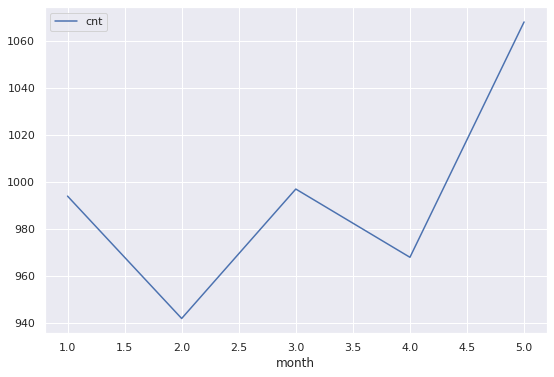

In [28]:
df_cnt = df.groupby('month', as_index=False).agg({'cnt': 'count'})
sns.set(rc={'figure.figsize': (9, 6)})
df_cnt.plot(x = 'month', y = 'cnt')


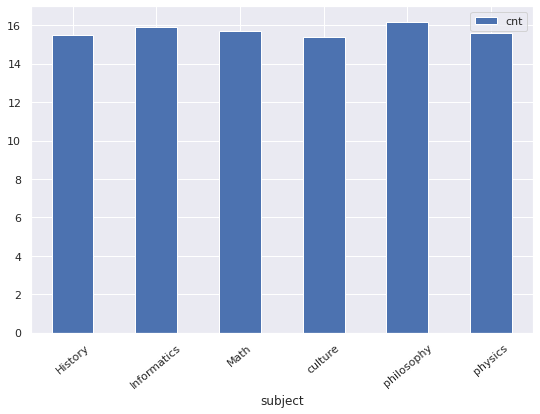

In [31]:
df_subject = df.groupby('subject', as_index=False).agg({'cnt': 'mean'})
sns.set(rc={'figure.figsize': (9, 6)})
df_subject.plot.bar(x='subject', rot=40)